In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
import statsmodels.api as sm
from arch import arch_model

GE_daily = pd.read_csv(r'C:\\MFE\\230e\\Assignments\\Assign-6\\GE_daily.csv')

SP_daily = pd.read_csv(r'C:\\MFE\\230e\\Assignments\\Assign-6\\s&p_daily.csv')


SP_monthly=SP_daily.set_index('Date')
SP_monthly.index = pd.to_datetime(SP_monthly.index)
SP_monthly=SP_monthly.loc[SP_monthly.groupby(SP_monthly.index.to_period('M')).apply(lambda x: x.index.max())]

SP_yearly=SP_daily.set_index('Date')
SP_yearly.index = pd.to_datetime(SP_yearly.index)
SP_yearly=SP_yearly.loc[SP_yearly.groupby(SP_yearly.index.to_period('Y')).apply(lambda x: x.index.max())]



GE_monthly=GE_daily.set_index('Date')
GE_monthly.index = pd.to_datetime(GE_monthly.index)
GE_monthly=GE_monthly.loc[GE_monthly.groupby(GE_monthly.index.to_period('M')).apply(lambda x: x.index.max())]

GE_yearly=GE_daily.set_index('Date')
GE_yearly.index = pd.to_datetime(GE_yearly.index)
GE_yearly=GE_yearly.loc[GE_yearly.groupby(GE_yearly.index.to_period('Y')).apply(lambda x: x.index.max())]


GE_daily_log=pd.DataFrame(np.log(GE_daily["Adj Close"]))
GE_monthly_log=pd.DataFrame(np.log(GE_monthly["Adj Close"]))
SP_daily_log=pd.DataFrame(np.log(SP_daily["Adj Close"]))
SP_monthly_log =pd.DataFrame(np.log(SP_monthly["Adj Close"]))
SP_yearly_log=np.log(SP_yearly["Adj Close"])
GE_yearly_log=np.log(GE_yearly["Adj Close"])

C:\Users\ANSHUL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
SP_monthly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-30,85.690002,86.330002,84.419998,85.019997,85.019997,12320000
1970-02-27,88.900002,90.330002,88.419998,89.500000,89.500000,12890000
1970-03-31,89.629997,90.169998,88.849998,89.629997,89.629997,8370000
1970-04-30,81.809998,82.570000,80.760002,81.519997,81.519997,9880000
1970-05-29,74.610001,76.919998,73.529999,76.550003,76.550003,14630000


In [3]:
SP_yearly.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-12-31,102.089996,102.089996,102.089996,102.089996,102.089996,14040000
1972-12-29,116.930000,118.769997,116.699997,118.050003,118.050003,27550000
1973-12-31,97.540001,98.300003,95.949997,97.550003,97.550003,23470000
1974-12-31,67.160004,69.040001,67.150002,68.559998,68.559998,20970000


In [4]:
def plot_ACF(x, p):
    x = np.array(x).reshape((-1,1))
    T = x.shape[0]
    se_approx = 1 / np.sqrt(T)
    ACF = np.zeros(p)
    ACF[0] = 1
    for i in range(1, p):
        ACF[i] = np.dot(x[i:, 0].T - np.average(x[i:, 0]), x[:-i, 0] - np.average(x[:-i, 0])) \
                 / np.dot(x.T - np.average(x), x - np.average(x))
    plt.stem(ACF)
    plt.fill_between(x=range(p+1), y1=-1.96 * se_approx, y2=1.96 * se_approx, facecolor='blue', alpha=0.1)

##  Autocorrelations

#### Daily

In [5]:
SP_return_daily_log=SP_daily_log[1:].reset_index(drop=True)-SP_daily_log[:-1].reset_index(drop=True)
GE_return_daily_log=GE_daily_log[1:].reset_index(drop=True)-GE_daily_log[:-1].reset_index(drop=True)
SP_return_monthly_log=SP_monthly_log[1:].reset_index(drop=True)-SP_monthly_log[:-1].reset_index(drop=True)
GE_return_monthly_log=GE_monthly_log[1:].reset_index(drop=True)-GE_monthly_log[:-1].reset_index(drop=True)
SP_return_yearly_log=SP_yearly_log[1:].reset_index(drop=True)-SP_yearly_log[:-1].reset_index(drop=True)
GE_return_yearly_log=GE_yearly_log[1:].reset_index(drop=True)-GE_yearly_log[:-1].reset_index(drop=True)


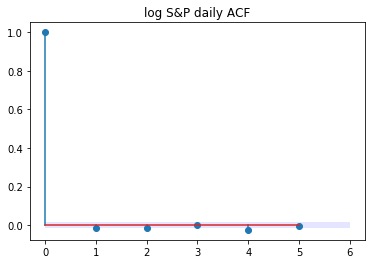

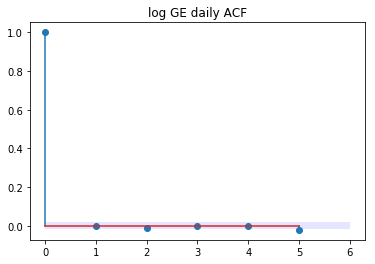

In [6]:
plot_ACF(SP_return_daily_log,6)
plt.title("log S&P daily ACF")
plt.show()
plot_ACF(GE_return_daily_log,6)
plt.title("log GE daily ACF")
plt.show()

#### Monthly

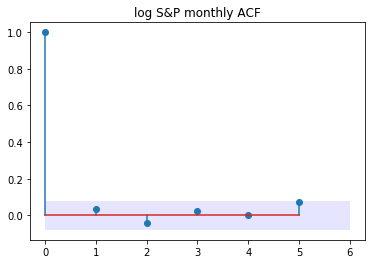

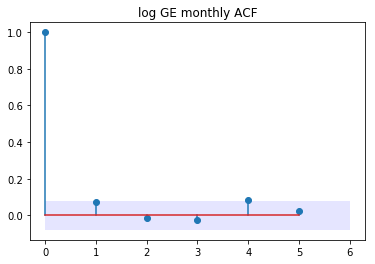

In [7]:
plot_ACF(SP_return_monthly_log,6)
plt.title("log S&P monthly ACF")
plt.show()
plot_ACF(GE_return_monthly_log,6)
plt.title("log GE monthly ACF")
plt.show()

#### Yearly

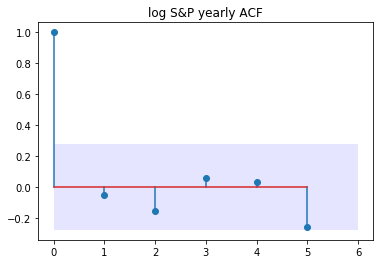

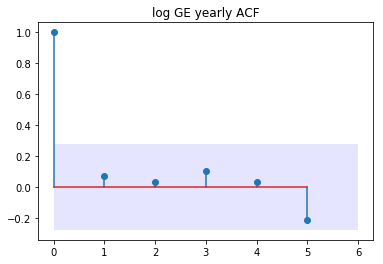

In [8]:
plot_ACF(SP_return_yearly_log,6)
plt.title("log S&P yearly ACF")
plt.show()
plot_ACF(GE_return_yearly_log,6)
plt.title("log GE yearly ACF")
plt.show()

#### B) Return Volatility

In [9]:
SP_Rvol_daily=(252**0.5)*((np.sum(SP_return_daily_log**2)/len(GE_return_daily_log))**0.5)
SP_Rvol_monthly=(12**0.5)*((np.sum(SP_return_monthly_log**2)/len(SP_return_monthly_log))**0.5)
SP_Rvol_yearly=(np.sum(SP_return_yearly_log**2)/len(SP_return_yearly_log))**0.5




print("Annualized RVOL for S&P daily returns:",SP_Rvol_daily)
print("Annualized RVOL for S&P monthly returns:",SP_Rvol_monthly)
print("Annualized RVOL for S&P yearly returns:",SP_Rvol_yearly)



Annualized RVOL for S&P daily returns: Adj Close    0.172471
dtype: float64
Annualized RVOL for S&P monthly returns: Adj Close    0.154205
dtype: float64
Annualized RVOL for S&P yearly returns: 0.1801835604385308


In [10]:
GE_Rvol_daily=(252**0.5)*((np.sum(GE_return_daily_log**2)/len(GE_return_daily_log))**0.5)
GE_Rvol_monthly=(12**0.5)*((np.sum(GE_return_monthly_log**2)/len(GE_return_monthly_log))**0.5)
GE_Rvol_yearly=(np.sum(GE_return_yearly_log**2)/len(GE_return_yearly_log))**0.5


print("Annualized RVOL for GE daily returns:",GE_Rvol_daily)
print("Annualized RVOL for GE monthly returns:",GE_Rvol_monthly)
print("Annualized RVOL for GE yearly returns:",GE_Rvol_yearly)

Annualized RVOL for GE daily returns: Adj Close    0.277944
dtype: float64
Annualized RVOL for GE monthly returns: Adj Close    0.256156
dtype: float64
Annualized RVOL for GE yearly returns: 0.31665977673950096


The annualized RVOL are not equal because the returns are not identically distributed, ie there are times of high volatility and low volatility, thus violating the IID condition.

#### C) Vol. monthly TS and Vol. Monthly TS based on daily values S&P

In this Notebook for computing the C)ii) time series, ie monthly Vol TS based on daily values- it is assumed that every month has 21 trading days, the exact computation is done in the other notebook.

Moreover In this notebook, only C)i) Time series, ie monthly volatility has been used for the analysis, the C)ii) analysis is based in another notebook.

In [11]:
SP_vol_monthly_TS=np.zeros((1,SP_return_monthly_log.shape[0]-1))

for i in range(0,SP_return_monthly_log.shape[0]-1):
    SP_vol_monthly_TS[0][i]=np.array(abs(SP_return_monthly_log[i:i+1]))
    
    
    
    
SP_vol_monthonolized_TS=np.zeros((1,int(SP_return_monthly_log.shape[0])-1))

for i in range(0,int(SP_return_monthly_log.shape[0]-1)):
    p=21*i
    SP_vol_monthonolized_TS[0][i]=((np.sum(SP_return_daily_log[p:p+21]**2))**0.5)
    
    


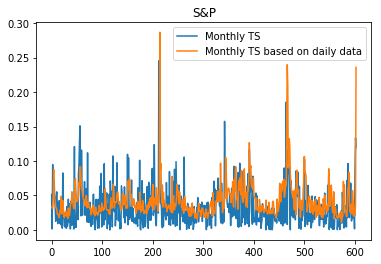

In [12]:

plt.plot(SP_vol_monthly_TS[0],label="Monthly TS")
plt.plot(SP_vol_monthonolized_TS[0],label="Monthly TS based on daily data")
plt.legend()
plt.title("S&P")
plt.show()

In [13]:
print("Mean of Monthly TS:", np.mean(SP_vol_monthly_TS[0]))
print("Mean of Monthly TS based on daily values:", np.mean(SP_vol_monthonolized_TS[0]))

Mean of Monthly TS: 0.0337055259936626
Mean of Monthly TS based on daily values: 0.042201697191398824


In [14]:
x=np.cov(SP_vol_monthly_TS[0],SP_vol_monthonolized_TS[0].T)
print("Variance of Monthly TS:", x[0][0])
print("Varianceb of Monthly TS based on daily values::", x[1][1])

print("Covariance of the two TS:",x[0][1])


Variance of Monthly TS: 0.0008492463570011786
Varianceb of Monthly TS based on daily values:: 0.000642130707952535
Covariance of the two TS: 0.00021844539284951355


The two TS are positively correlated

#### Vol. monthly TS and Vol. Monthly TS based on daily values GE

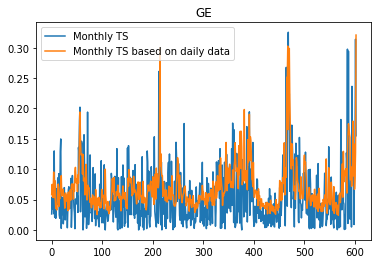

In [15]:
GE_vol_monthly_TS=np.zeros((1,GE_return_monthly_log.shape[0]-1))

for i in range(0,GE_return_monthly_log.shape[0]-1):
    GE_vol_monthly_TS[0][i]=np.array(abs(GE_return_monthly_log[i:i+1]))
    
    
    
    
GE_vol_monthonolized_TS=np.zeros((1,int(GE_return_monthly_log.shape[0])-1))

for i in range(0,int(GE_return_monthly_log.shape[0]-1)):
    p=21*i
    GE_vol_monthonolized_TS[0][i]=((np.sum(GE_return_daily_log[p:p+21]**2))**0.5)


plt.plot(GE_vol_monthly_TS[0],label="Monthly TS")
plt.plot(GE_vol_monthonolized_TS[0],label="Monthly TS based on daily data")
plt.legend()
plt.title("GE")
plt.show()    

In [16]:
print("Mean of Monthly TS:", np.mean(GE_vol_monthly_TS[0]))
print("Mean of Monthly TS based on daily values:", np.mean(GE_vol_monthonolized_TS[0]))
x=np.cov(GE_vol_monthly_TS[0],GE_vol_monthonolized_TS[0].T)
print("Variance of Monthly TS:", x[0][0])
print("Varianceb of Monthly TS based on daily values::", x[1][1])

print("Covariance of the two TS:",x[0][1])

Mean of Monthly TS: 0.05437583374627002
Mean of Monthly TS based on daily values: 0.06965107651694113
Variance of Monthly TS: 0.002510835281859076
Varianceb of Monthly TS based on daily values:: 0.0014390571829459551
Covariance of the two TS: 0.0007470243911843056


####  AR(1) on RVAR (Realized Vol.) S&P

In [17]:
y=pd.DataFrame(SP_vol_monthly_TS[0][1:]**2)
x=pd.DataFrame(SP_vol_monthly_TS[0][:-1]**2)
x.columns=(["Var_(t-1)"])
ones=np.ones((len(x.index),1))                         
df_ones=pd.DataFrame(ones)
x["const"]=df_ones
model = sm.OLS(y, x)
results_x = model.fit()
results_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     16.65
Date:                Fri, 08 May 2020   Prob (F-statistic):           5.10e-05
Time:                        01:32:26   Log-Likelihood:                 2472.6
No. Observations:                 602   AIC:                            -4941.
Df Residuals:                     600   BIC:                            -4932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Var_(t-1)      0.1656      0.041      4.080      0.000       0.086       0.245
const          0.0017      0.000      9.159      0.000       0.001       0.002
==============================================================================
Omnibus:                      839.414   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188349.432
Skew:                           7.276   Prob(JB):                         0.00
Kurtosis:                      88.423   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

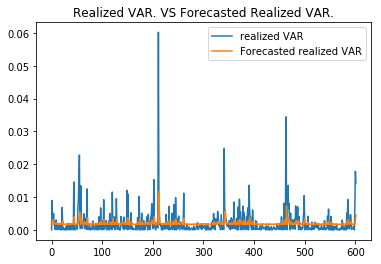

In [18]:
forecast=np.dot(results_x.params,x.T)
plt.plot(y,label="realized VAR")
plt.plot(forecast,label="Forecasted realized VAR")
plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

The MSE of the forecast by ARCH(1) is: 0.0009288255959563461
The RMSE of the forecast by ARCH(1) is: 0.03047664016843632
The MAE of the forecast by ARCH(1) is: 0.010484669733890698


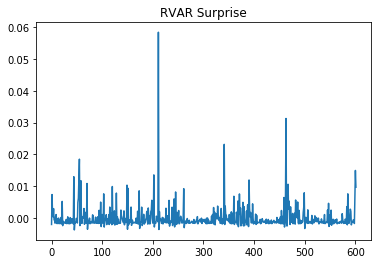

In [19]:
VAR_surp=pd.DataFrame(y[0])-pd.DataFrame(forecast)
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp=pd.DataFrame(y[0]**0.5)-pd.DataFrame(forecast**0.5)
MSE= np.sum(VOL_surp**2)/(len(VOL_surp))
print("The MSE of the forecast by ARCH(1) is:",MSE[0])
print("The RMSE of the forecast by ARCH(1) is:",np.sqrt(MSE[0]))

MAE=abs(np.sum(pd.DataFrame(y[0]**0.5)-pd.DataFrame(forecast**0.5))/len(forecast))
print("The MAE of the forecast by ARCH(1) is:",MAE[0])

#### ARCH Model S&P

In [20]:
from arch import arch_model
am = arch_model(SP_return_monthly_log, p=1, o=0, q=0)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:                1040.42
Distribution:                  Normal   AIC:                          -2074.83
Method:            Maximum Likelihood   BIC:                          -2061.62
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      601
Time:                        01:32:26   Df Model:                            3
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.5845e-03  1.776e-03      4.271  1.945e-05 [4.

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001948. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


The ARCH(1) parameters match the AR(1) results above, thus validating the procedure.

#### AR(1) on RVAR GE

In [21]:
y=pd.DataFrame(GE_vol_monthly_TS[0][1:]**2)
x=pd.DataFrame(GE_vol_monthly_TS[0][:-1]**2)
x.columns=(["Var_(t-1)"])
ones=np.ones((len(x.index),1))                         
df_ones=pd.DataFrame(ones)
x["const"]=df_ones
model = sm.OLS(y, x)
results_x = model.fit()
results_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     33.83
Date:                Fri, 08 May 2020   Prob (F-statistic):           9.78e-09
Time:                        01:32:26   Log-Likelihood:                 1860.7
No. Observations:                 602   AIC:                            -3717.
Df Residuals:                     600   BIC:                            -3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Var_(t-1)      0.2315      0.040      5.816      0.000       0.153       0.310
const          0.0042      0.000      8.453      0.000       0.003       0.005
==============================================================================
Omnibus:                      622.679   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25565.125
Skew:                           4.832   Prob(JB):                         0.00
Kurtosis:                      33.427   Cond. No.                         88.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

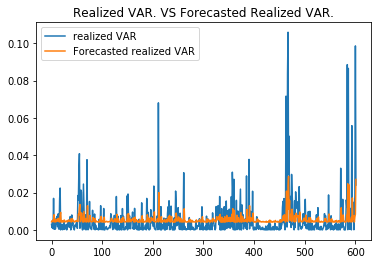

In [22]:
forecast=np.dot(results_x.params,x.T)
plt.plot(y,label="realized VAR")
plt.plot(forecast,label="Forecasted realized VAR")

plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

The MSE of the forecast by ARCH(1) is: 0.002756929824525328
The RMSE of the forecast by ARCH(1) is: 0.05250647412010569
The MAE of the forecast by ARCH(1) is: 0.018356047460985906


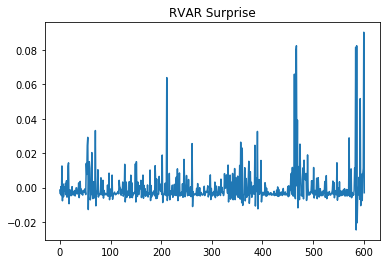

In [23]:
VAR_surp=pd.DataFrame(y[0])-pd.DataFrame(forecast)
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp=pd.DataFrame(y[0]**0.5)-pd.DataFrame(forecast**0.5)
MSE= np.sum(VOL_surp**2)/(len(VOL_surp))
print("The MSE of the forecast by ARCH(1) is:",MSE[0])
print("The RMSE of the forecast by ARCH(1) is:",np.sqrt(MSE[0]))
MAE=abs(np.sum(pd.DataFrame(y[0]**0.5)-pd.DataFrame(forecast**0.5))/len(forecast))
print("The MAE of the forecast by ARCH(1) is:",MAE[0])


The AR(1) on variance matches the ARCH(1) thus validating the procedure.

#### ARCH model GE

In [24]:
am = arch_model(GE_return_monthly_log, p=1, o=0, q=0)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                       ARCH   Log-Likelihood:                737.500
Distribution:                  Normal   AIC:                          -1469.00
Method:            Maximum Likelihood   BIC:                          -1455.79
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      601
Time:                        01:32:27   Df Model:                            3
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0109  2.918e-03      3.724  1.958e-04 [5.

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


#### GARCH model

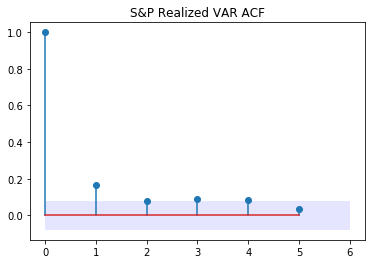

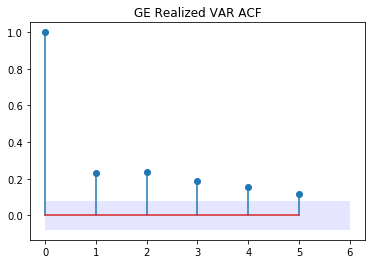

In [25]:
plot_ACF(SP_vol_monthly_TS[0]**2,6)
plt.title("S&P Realized VAR ACF")
plt.show()
plot_ACF(GE_vol_monthly_TS[0]**2,6)
plt.title("GE Realized VAR ACF")
plt.show()


From the above plot, reaized volatility is persistent, thus ARCH is not a sufficiently good model, we expect better RMSE from GARCH models.

#### GARCH(1,1) S&P

In [26]:
am = arch_model(SP_return_monthly_log*10, p=1, o=0, q=1)
res = am.fit(update_freq=10)
print(res.summary())

Iteration:     10,   Func. Count:     73,   Neg. LLF: 337.7621927998366
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 337.7613254552977
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -337.761
Distribution:                  Normal   AIC:                           683.523
Method:            Maximum Likelihood   BIC:                           701.137
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      600
Time:                        01:32:27   Df Model:                            4
       

Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

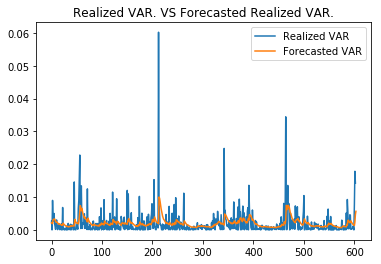

In [27]:
plt.plot((SP_vol_monthly_TS[0])**2,label="Realized VAR")
plt.plot((res.conditional_volatility/10)**2,label="Forecasted VAR")
plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

For this simulation GARCH(1,1) for s&p, we have scaled up the data because the optimizer was running into convergence issues.


The RMSE of the forecast by GARCH(1,1) is: 0.026171795029531743
The MAE of the forecast by GARCH(1,1) is: 0.010026711040655369


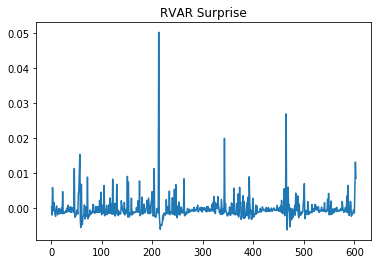

In [28]:
VAR_surp=SP_vol_monthly_TS[0]**2-(res.conditional_volatility[1:]/10)**2
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp_Garch=SP_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:]/10)
RMSE= np.sqrt(np.sum(VOL_surp_Garch**2)/(len(VOL_surp_Garch)))
print("The RMSE of the forecast by GARCH(1,1) is:",RMSE)

MAE=abs(np.sum(SP_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:]/10))/len(SP_vol_monthly_TS[0]))
print("The MAE of the forecast by GARCH(1,1) is:",MAE)

In [29]:
RVAR_on_cond=sm.OLS(SP_vol_monthly_TS[0]**2,(res.conditional_volatility[1:]/10)**2)
result=RVAR_on_cond.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     448.7
Date:                Fri, 08 May 2020   Prob (F-statistic):           7.80e-75
Time:                        01:32:28   Log-Likelihood:                 2571.5
No. Observations:                 603   AIC:                            -5141.
Df Residuals:                     602   BIC:                            -5137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cond_vol       1.2069      0.057     21.182      0.000       1.095       1.319
==============================================================================
Omnibus:                      804.737   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163590.131
Skew:                           6.717   Prob(JB):                         0.00
Kurtosis:                      82.565   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GARCH(1,1) GE

In [30]:
am = arch_model(GE_return_monthly_log, p=1, o=0, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                770.952
Distribution:                  Normal   AIC:                          -1533.90
Method:            Maximum Likelihood   BIC:                          -1516.29
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      600
Time:                        01:32:28   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0101  2.609e-03      3.877  1.056e-04 [5.

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

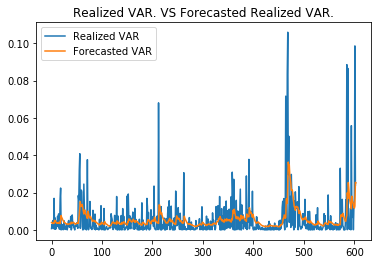

In [31]:
plt.plot(GE_vol_monthly_TS[0]**2,label="Realized VAR")
plt.plot(res.conditional_volatility**2,label="Forecasted VAR")
plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

The RMSE of the forecast by GARCH(1,1) is: 0.043618959628650464
The MAE of the forecast by GARCH(1,1) is: 0.016167227573196274


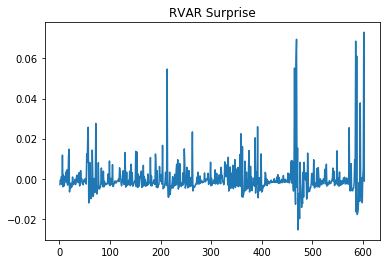

In [32]:
VAR_surp=GE_vol_monthly_TS[0]**2-res.conditional_volatility[1:]**2
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp_Garch=GE_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:])
RMSE= np.sqrt(np.sum(VOL_surp_Garch**2)/(len(VOL_surp_Garch)))
print("The RMSE of the forecast by GARCH(1,1) is:",RMSE)
MAE=abs(np.sum(GE_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:]))/len(SP_vol_monthly_TS[0]))
print("The MAE of the forecast by GARCH(1,1) is:",MAE)

In [33]:
RVAR_on_cond=sm.OLS(GE_vol_monthly_TS[0]**2,res.conditional_volatility[1:]**2)
result=RVAR_on_cond.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     596.4
Date:                Fri, 08 May 2020   Prob (F-statistic):           4.62e-92
Time:                        01:32:28   Log-Likelihood:                 1991.9
No. Observations:                 603   AIC:                            -3982.
Df Residuals:                     602   BIC:                            -3977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cond_vol       1.2404      0.051     24.421      0.000       1.141       1.340
==============================================================================
Omnibus:                      526.031   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15744.357
Skew:                           3.766   Prob(JB):                         0.00
Kurtosis:                      26.873   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Choosing best GARCH model

In [34]:
def compute_RMSE(estimate,realised):
   
    VOL_surp_Garch=(realised)-(estimate)
    RMSE= np.sqrt(np.sum(VOL_surp_Garch**2)/(len(VOL_surp_Garch)))
    return RMSE


#### S&P

In [35]:
RMSE_mat=np.zeros((5,5))

for i in range(1,6):
    for j in range(1,6):
        am = arch_model(SP_return_monthly_log, p=i, o=0, q=j)
        res = am.fit(update_freq=5, disp='off')
        
        RMSE_mat[i-1][j-1]=compute_RMSE(res.conditional_volatility[1:],SP_vol_monthly_TS[0])
        


C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001948. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001948. Paramete

In [36]:
print(RMSE_mat)


[[0.02645251 0.02617219 0.02617191 0.02617189 0.02617151]
 [0.02685958 0.02564492 0.02564554 0.02688683 0.0256451 ]
 [0.02686155 0.02649009 0.02759112 0.02759077 0.02759124]
 [0.02686105 0.02648975 0.02759112 0.02759123 0.02722909]
 [0.02686166 0.02648978 0.02759107 0.02649726 0.02722917]]


The best GARCH(p,q) according to RMSE is GARCH(2,2) for S&P

#### GE

In [37]:
RMSE_mat=np.zeros((5,5))

for i in range(1,6):
    for j in range(1,6):
        am = arch_model(GE_return_monthly_log, p=i, o=0, q=j)
        res = am.fit(update_freq=5, disp='off')
        
        RMSE_mat[i-1][j-1]=compute_RMSE(res.conditional_volatility[1:],GE_vol_monthly_TS[0])
        

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale

In [38]:
print(RMSE_mat)

[[0.04361896 0.04177637 0.04361919 0.04347429 0.04299778]
 [0.04542771 0.0454414  0.04571445 0.04561689 0.04545546]
 [0.04542773 0.04538826 0.0460183  0.04539276 0.04539255]
 [0.04542777 0.04538853 0.04601927 0.04539971 0.04539227]
 [0.04542751 0.0453881  0.04601822 0.04539339 0.04539305]]


The best GARCH(p,q) according to RMSE is GARCH(1,2) for S&P

####  GJR-Garch(1,1) S&P

In [39]:
am = arch_model(SP_return_monthly_log, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                1057.48
Distribution:                  Normal   AIC:                          -2104.96
Method:            Maximum Likelihood   BIC:                          -2082.95
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      599
Time:                        01:32:32   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.0798e-03  1.666e-03      3.649  2.633e-04 [2.

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001948. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

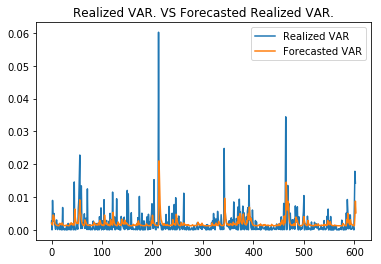

In [40]:
plt.plot(SP_vol_monthly_TS[0]**2,label="Realized VAR")
plt.plot(res.conditional_volatility**2,label="Forecasted VAR")
plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

The RMSE of the forecast by GJR-GARCH(1,1) is: 0.02482157858988685
The MAE of the forecast by GJR-GARCH(1,1) is: 0.009365456864398835


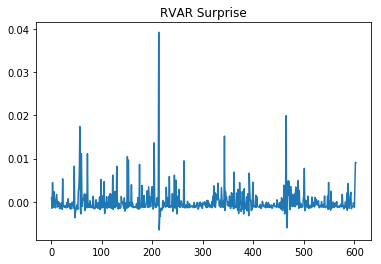

In [41]:
VAR_surp=SP_vol_monthly_TS[0]**2-res.conditional_volatility[1:]**2
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp_Garch=SP_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:])
RMSE= np.sqrt(np.sum(VOL_surp_Garch**2)/(len(VOL_surp_Garch)))
print("The RMSE of the forecast by GJR-GARCH(1,1) is:",RMSE)
MAE=abs(np.sum(SP_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:]))/len(SP_vol_monthly_TS[0]))
print("The MAE of the forecast by GJR-GARCH(1,1) is:",MAE)

The RMSE of this model is smaller than the best GARCH model found before

In [42]:
RVAR_on_cond=sm.OLS(SP_vol_monthly_TS[0]**2,res.conditional_volatility[1:]**2)
result=RVAR_on_cond.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     936.8
Date:                Fri, 08 May 2020   Prob (F-statistic):          8.64e-125
Time:                        01:32:33   Log-Likelihood:                 2686.6
No. Observations:                 603   AIC:                            -5371.
Df Residuals:                     602   BIC:                            -5367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cond_vol       1.3828      0.045     30.607      0.000       1.294       1.472
==============================================================================
Omnibus:                      609.648   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39470.910
Skew:                           4.429   Prob(JB):                         0.00
Kurtosis:                      41.633   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The predictabiliy implied by R-squared is also better than GARCH models.

#### GE

In [43]:
am = arch_model(GE_return_monthly_log, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:                776.269
Distribution:                  Normal   AIC:                          -1542.54
Method:            Maximum Likelihood   BIC:                          -1520.52
                                        No. Observations:                  604
Date:                Fri, May 08 2020   Df Residuals:                      599
Time:                        01:32:33   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8824e-03  2.618e-03      3.011  2.602e-03 [2.

C:\Users\ANSHUL\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Text(0.5, 1.0, 'Realized VAR. VS Forecasted Realized VAR.')

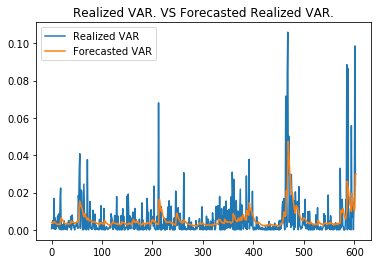

In [44]:
plt.plot(GE_vol_monthly_TS[0]**2,label="Realized VAR")
plt.plot(res.conditional_volatility**2,label="Forecasted VAR")
plt.legend()
plt.title("Realized VAR. VS Forecasted Realized VAR.")

The RMSE of the forecast by GJR-GARCH(1,1) is: 0.04357811698411323
The MAE of the forecast by GJR-GARCH(1,1) is: 0.015568669505486372


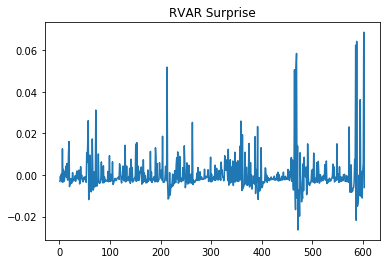

In [45]:
VAR_surp=GE_vol_monthly_TS[0]**2-res.conditional_volatility[1:]**2
plt.plot(VAR_surp)
plt.title("RVAR Surprise")

VOL_surp_Garch=GE_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:])
RMSE= np.sqrt(np.sum(VOL_surp_Garch**2)/(len(VOL_surp_Garch)))
print("The RMSE of the forecast by GJR-GARCH(1,1) is:",RMSE)
MAE=abs(np.sum(GE_vol_monthly_TS[0]-np.array(res.conditional_volatility[1:]))/len(SP_vol_monthly_TS[0]))
print("The MAE of the forecast by GJR-GARCH(1,1) is:",MAE)

The RMSE of this model is smaller than the best GARCH model 

In [46]:
RVAR_on_cond=sm.OLS(GE_vol_monthly_TS[0]**2,res.conditional_volatility[1:]**2)
result=RVAR_on_cond.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     678.6
Date:                Fri, 08 May 2020   Prob (F-statistic):          9.55e-101
Time:                        01:32:33   Log-Likelihood:                 2011.9
No. Observations:                 603   AIC:                            -4022.
Df Residuals:                     602   BIC:                            -4017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cond_vol       1.2357      0.047     26.049      0.000       1.143       1.329
==============================================================================
Omnibus:                      457.362   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9818.351
Skew:                           3.155   Prob(JB):                         0.00
Kurtosis:                      21.734   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The predictabiliy implied by R-squared is also better than GARCH models.

#### Summary

S&P RMSE:<br>      AR(1):0.03047664016843632     <br>
          GARCH(1,1):0.026171795029531743    <br>
      GJR-GARCH(1,1):0.02482157858988685     <br>
 
 <br>

MAE :<br>      AR(1):0.010484669733890698     <br>
          GARCH(1,1):0.010026711040655369    <br>
      GJR-GARCH(1,1):0.009365456864398835     <br>    
 <br>
R-Squared: <br>
          GARCH(1,1):0.427    <br>
      GJR-GARCH(1,1):0.609     <br>    
 
 <br> <br>
 
 
 
GE  RMSE:<br>      AR(1):0.05250647412010569     <br>
          GARCH(1,1):0.043618959628650464    <br>
      GJR-GARCH(1,1):0.04357811698411323     <br>
 
MAE :<br>      AR(1):0.018356047460985906     <br>
          GARCH(1,1):0.016167227573196274    <br>
      GJR-GARCH(1,1):0.015568669505486372     <br>   
      
<br>
 <br>
R-Squared: <br>
          GARCH(1,1):0.498    <br>
      GJR-GARCH(1,1):0.530     <br>    
 
 <br> 
 

The RMSE and MAE both are decreasing as we move from ARCH(1) to GARCH(1,1) and GJR-GARCH(1,1). The R-squares also improve in moving from GARCH to GJR-GARCH because the unsymmetric nature of volatility shock is captured in these models.